In [ ]:
# !pip install -e ../../text2fx
# !pip install msclap
# import torch

In [1]:
%reload_ext autoreload
# %load_ext autoreload
%autoreload 2

import os
import sys
import warnings
from contextlib import contextmanager

from pathlib import Path
import random
import numpy as np
import torch
from audiotools import AudioSignal
from typing import Union, List, Optional, Tuple, Iterable, Dict
import dasp_pytorch
import matplotlib.pyplot as plt

import rich
from rich import pretty
from rich.traceback import install

from typing import Union

import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime
warnings.filterwarnings("ignore", category=UserWarning)
pretty.install()
install()

NOTEBOOKS_DIR = Path(os.path.abspath(''))
PROJECT_DIR = NOTEBOOKS_DIR.parent
ASSETS_DIR = PROJECT_DIR / "assets"
PRETRAINED_DIR = PROJECT_DIR / "pretrained"
DATA_DIR = PROJECT_DIR / "data"
RUNS_DIR = PROJECT_DIR / "runs"

EXPERIMENTS_DIR = PROJECT_DIR / "experiments"

@contextmanager
def chdir(path: Union[str, Path]):
    origin = Path().absolute()
    try:
        os.chdir(path)
        yield
    finally:
        os.chdir(origin)

sys.path.insert(0, str(PROJECT_DIR))
with chdir(PROJECT_DIR):
    import text2fx
    import text2fx.core
    from text2fx.__main__ import text2fx
    from text2fx.core import Channel
    # from text2fx.msclap import CLAP

<IPython.core.display.HTML object>

<IPython.core.display.HTML object>
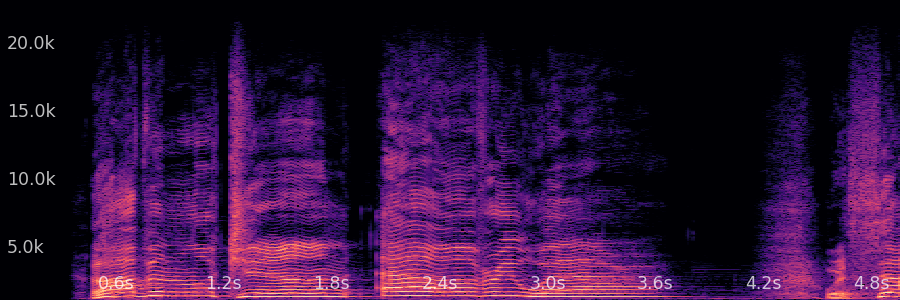
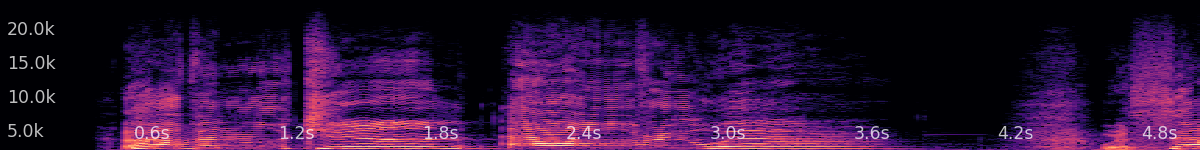

In [2]:
# Load audio examples
exts = ["mp3", "wav", "flac"]
_MUSIC_EXAMPLES_DIR = ASSETS_DIR / 'multistem_examples'
_SPEECH_EXAMPLES_DIR = ASSETS_DIR / 'speech_examples'
example_music = [list(_MUSIC_EXAMPLES_DIR.rglob(f"*.{e}")) for e in exts]
example_speech = [list(_SPEECH_EXAMPLES_DIR.rglob(f"*.{e}")) for e in exts]

example_music = sum(example_music, [])  # Trick to flatten list of lists
example_speech = sum(example_speech, [])  # Trick to flatten list of lists

examples = example_music + example_speech # 5 music, 3 speech

# print(f'Music Examples: {[path.stem for path in examples[:4]]}')
# print(f'Speech Examples: {[path.stem for path in examples[5:]]}')

clean1 = AudioSignal(examples[0], duration=5).to_mono().resample(44_100).normalize(-24)
clean2 = AudioSignal(examples[7]).to_mono().resample(44_100).normalize(-24)

clean1.widget()

In [3]:
"""
Call text2FX -- CHANGE TO USING
import text2fx

tex2fx.applytext2fx(audio, text)

optimizing....
"""
def text2fx_it(sig,
               text_target,
               fx_ch=Channel(dasp_pytorch.ParametricEQ(44_100),),
       model_name='ms_clap', 
       n_iters=600, 
       lr = 1e-2,
       criterion="cosine-sim", 
       params_init_type="random"):

    # Perform inference using the text2fx function
    output_sig, out_params, out_params_dict = text2fx(
        model_name=model_name,
        sig_in=sig, 
        text=text_target,
        export_audio=False,
        channel=fx_ch,
        lr=lr,
        device='cuda',
        # roll_amt = 1000,
        criterion=criterion,
        params_init_type=params_init_type,
        n_iters=n_iters
    )
    return output_sig, out_params, out_params_dict

text2fx_it(examples[0], 'warm and cozy')

step: 171/600, loss: 0.686:  28%|█████████▋                        | 171/600 [00:11<00:28, 15.04it/s]


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:34                                                                                   │
│                                                                                                  │
│   31 │   )                                                                                       │
│   32 │   return output_sig, out_params, out_params_dict                                          │
│   33                                                                                             │
│ ❱ 34 text2fx_it(examples[0], 'warm and cozy')                                                    │
│   35                                                                                             │
│                                                                                                  │
│ in text2fx_it:19                                                                                 │
│                                                                                                  │
│   16 │      params_init_type="random"):                                                          │
│   17 │                                                                                           │
│   18 │   # Perform inference using the text2fx function                                          │
│ ❱ 19 │   output_sig, out_params, out_params_dict = text2fx(                                      │
│   20 │   │   model_name=model_name,                                                              │
│   21 │   │   sig_in=sig,                                                                         │
│   22 │   │   text=text_target,                                                                   │
│                                                                                                  │
│ /home/annie/research/text2fx/text2fx/__main__.py:236 in text2fx                                  │
│                                                                                                  │
│   233 │   │                                                                                      │
│   234 │   │   # Optimize                                                                         │
│   235 │   │   optimizer.zero_grad()                                                              │
│ ❱ 236 │   │   loss.backward()                                                                    │
│   237 │   │   optimizer.step()                                                                   │
│   238 │   │                                                                                      │
│   239 │   │   pbar.set_description(f"step: {n+1}/{n_iters}, loss: {loss.item():.3f}")            │
│                                                                                                  │
│ /home/annie/miniconda3/envs/fx2fx/lib/python3.9/site-packages/torch/_tensor.py:492 in backward   │
│                                                                                                  │
│    489 │   │   │   │   create_graph=create_graph,                                                │
│    490 │   │   │   │   inputs=inputs,                                                            │
│    491 │   │   │   )                                                                             │
│ ❱  492 │   │   torch.autograd.backward(                                                          │
│    493 │   │   │   self, gradient, retain_graph, create_graph, inputs=inputs                     │
│    494 │   │   )                                                                                 │
│    495                                                                                           │
│                                                                                                  │
│ /home/annie/miniconda3/envs/fx2fx/lib/python3.9/site-packag

In [ ]:
"""
text2fx outputs: play input, exported FXparams, and output audio (2 ways -- playing effected_sig directly and apply FXparams to input) 
"""

In [ ]:
"""
Plot freq_response
"""